In [33]:
 # -*- coding: utf-8 -*-
from PIL import Image
from pylab import *
from scipy.ndimage import filters
import numpy

In [34]:
im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg').convert('L'))
print(im.shape)

(972, 1452)


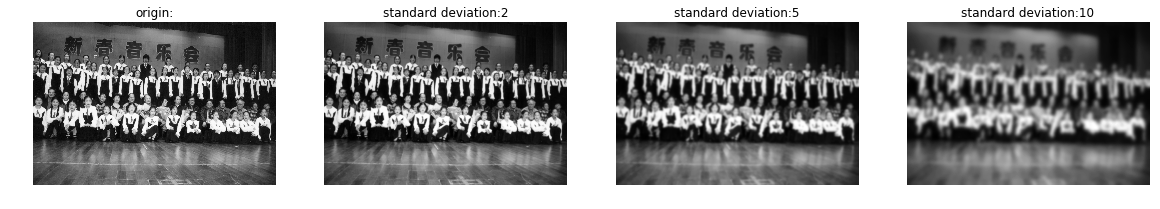

In [9]:
# for one-dim image:

figure(figsize=(20,3))
gray()
axis('off')
subplot(1, 4, 1)
axis('off')
title('origin:')
imshow(im)

for bi, blur in enumerate([2, 5, 10]):
  im2 = zeros(im.shape)
  im2 = filters.gaussian_filter(im, blur)
  im2 = np.uint8(im2)
  imNum=str(blur)
  subplot(1, 4, 2 + bi)
  axis('off')
  title("standard deviation:"+imNum)
  imshow(im2)

show()

(972, 1452, 3)


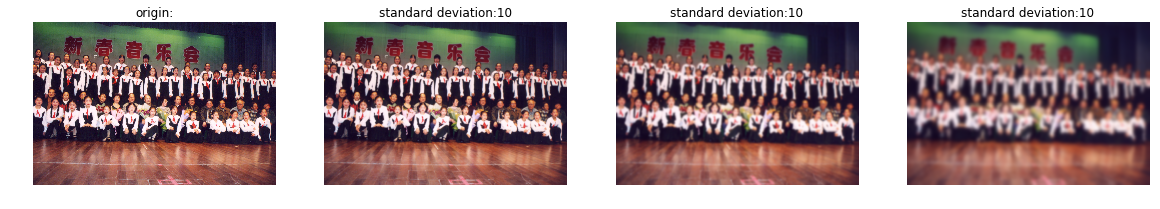

In [12]:
im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg'))
print(im.shape)

figure(figsize=(20,3))
axis('off')
subplot(1, 4, 1)
axis('off')
title('origin:')
imshow(im)

# if RGB, blur every channel one by one:
for bi, blur in enumerate([2, 5, 10]):
    im2 = zeros(im.shape)
    for i in range(3):
        im2[:, :, i] = filters.gaussian_filter(im[:, :, i], blur)
        im2 = np.uint8(im2)
    subplot(1, 4,  2 + bi)
    axis('off')
    title("standard deviation:"+imNum)
    imshow(im2)


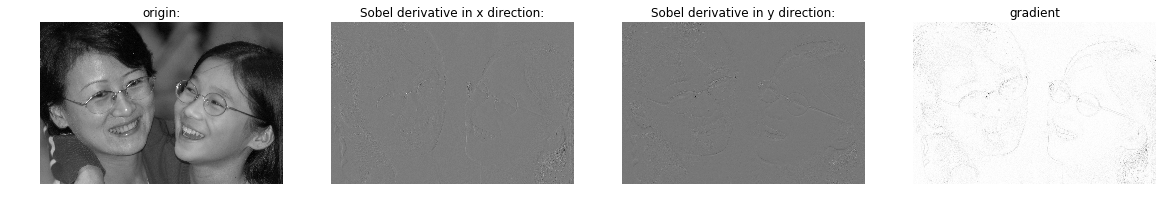

In [45]:
from PIL import Image, ImageEnhance

im = array(Image.open('/Users/stephaniexia/Documents/didi/sing/1834.JPG').convert('L'))
gray()

figure(figsize=(20,3))
subplot(1, 4, 1)
axis('off')
title('origin:')
imshow(im)

# Sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im, 1, imx)
subplot(1, 4, 2)
axis('off')
title('Sobel derivative in x direction:')
imshow(imx)

imy = zeros(im.shape)
filters.sobel(im, 0, imy)
subplot(1, 4, 3)
axis('off')
title('Sobel derivative in y direction:')
imshow(imy)

#mag = numpy.sqrt(imx**2 + imy**2)
mag = 255-numpy.sqrt(imx**2 + imy**2)

subplot(1, 4, 4)
title('gradient')
axis('off')
imshow(mag)

show()

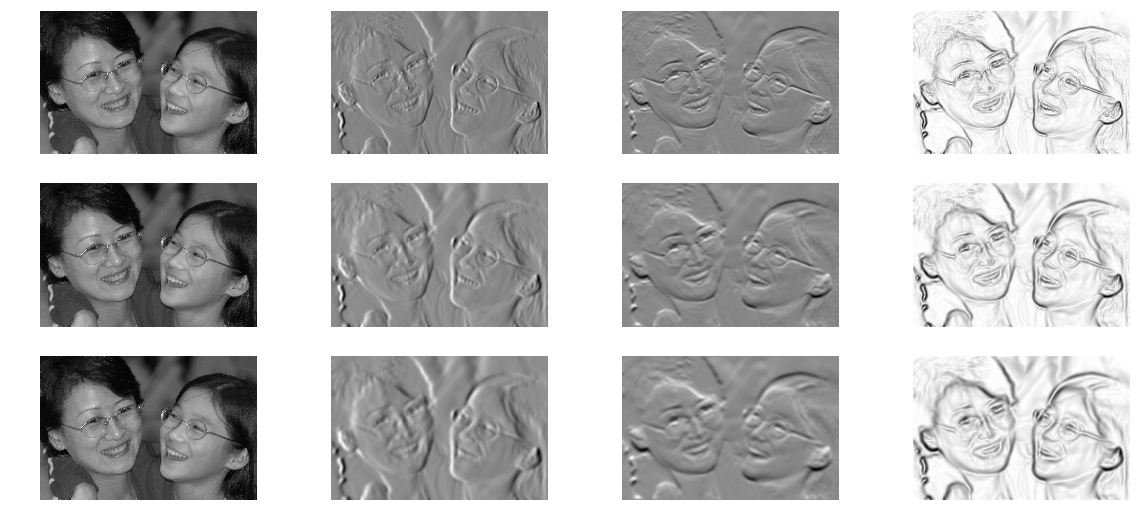

In [36]:
def imx(im, sigma):
    imgx = zeros(im.shape)
    filters.gaussian_filter(im, sigma, (0, 1), imgx)
    return imgx


def imy(im, sigma):
    imgy = zeros(im.shape)
    filters.gaussian_filter(im, sigma, (1, 0), imgy)
    return imgy


def mag(im, sigma):
    # there's also gaussian_gradient_magnitude()
    #mag = numpy.sqrt(imgx**2 + imgy**2)
    imgmag = 255 - numpy.sqrt(imgx ** 2 + imgy ** 2)
    return imgmag


im = array(Image.open('/Users/stephaniexia/Documents/didi/sing/1834.JPG').convert('L'))
figure(figsize=(20,9))
gray()

sigma = [10, 15, 20]

for i in  sigma:
    subplot(3, 4, 4*(sigma.index(i))+1)
    axis('off')
    imshow(im)
    imgx=imx(im, i)
    subplot(3, 4, 4*(sigma.index(i))+2)
    axis('off')
    imshow(imgx)
    imgy=imy(im, i)
    subplot(3, 4, 4*(sigma.index(i))+3)
    axis('off')
    imshow(imgy)
    imgmag=mag(im, i)
    subplot(3, 4, 4*(sigma.index(i))+4)
    axis('off')
    imshow(imgmag)

show()

/Users/stephaniexia/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


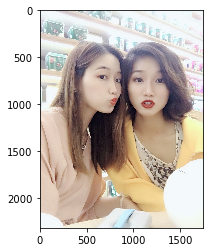

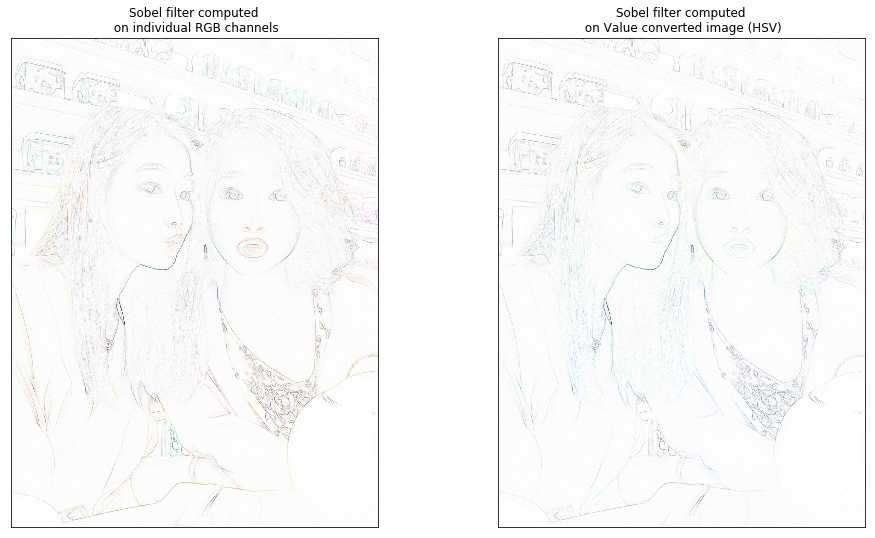

In [59]:
from skimage import data
from skimage import io
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters
from skimage.color import rgb2gray, gray2rgb

def norm(impath):
    rgb_img = data.imread(impath)
    gray_img = rgb2gray(rgb_img)

    # Now normalize gray image
    gray_norm = gray_img / numpy.max(gray_img)

    # Now convert back
    rgb_norm = gray2rgb(gray_norm)
    
    return rgb_norm


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

impath ='/Users/stephaniexia/Documents/didi/sing/1834.JPG'
image = norm(impath)
# display the original image
image = data.imread('/Users/stephaniexia/Downloads/IMG_1458.JPG')
plt.imshow(image)

fig = plt.figure(figsize=(16, 9))
ax_each = fig.add_subplot(121, adjustable='box-forced')
ax_hsv = fig.add_subplot(122, sharex=ax_each, sharey=ax_each, adjustable='box-forced')

# We use 1 - sobel_each(image)
# but this will not work if image is not normalized
im_each = rescale_intensity(1 - sobel_each(image))
ax_each.imshow(im_each)
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")
io.imsave('/Users/stephaniexia/Downloads/IMG_1458_RGB.jpg', im_each)

# We use 1 - sobel_hsv(image) but this will not work if image is not normalized
im_hsv = rescale_intensity(1 - sobel_hsv(image))
ax_hsv.imshow(im_hsv)
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on Value converted image (HSV)")
io.imsave('/Users/stephaniexia/Downloads/IMG_1458_HSV.jpg', im_hsv)

plt.show()

In [31]:
from PIL import Image, ImageEnhance

im =Image.open("/Users/stephaniexia/Documents/didi/sing/1834_HSV.JPG")
im01 = ImageEnhance.Color(im).enhance(10)
im02 =ImageEnhance.Contrast(im01).enhance(3)
im02.show()


In [ ]:
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
image = img_as_float(data.moon())
gam1= exposure.adjust_gamma(image, 2) 

/Users/stephaniexia/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


(-0.5, 2159.5, 3839.5, -0.5)

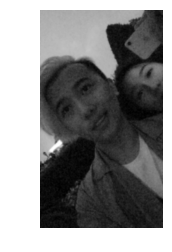

In [64]:
from numpy import *


def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=50):
    """ An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
        using the numerical procedure presented in Eq. (11) of A. Chambolle
        (2005). Implemented using periodic boundary conditions.
        
        Input: noisy input image (grayscale), initial guess for U, weight of 
        the TV-regularizing term, steplength, tolerance for the stop criterion
        
        Output: denoised and detextured image, texture residual. """
        
    m,n = im.shape #size of noisy image

    # initialize
    U = U_init
    Px = zeros((m, n)) #x-component to the dual field
    Py = zeros((m, n)) #y-component of the dual field
    error = 1 
    
    while (error > tolerance):
        Uold = U
        
        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U's gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U's gradient
        
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx # non-normalized update of x-component (dual)
        PyNew = Py + (tau/tv_weight)*GradUy # non-normalized update of y-component (dual)
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)
        
        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable
        
        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);
        
    return U,im-U # denoised image and texture residual

im = array(Image.open('/Users/stephaniexia/Downloads/IMG_0227.JPG').convert('L'))

U,T = denoise(im,im)
G = filters.gaussian_filter(im,10)
imshow(U)
imshow(G)
img = Image.fromarray(U.astype(numpy.uint8))
img.save('/Users/stephaniexia/Downloads/IMG_0227_denoise.jpg')
#axis('equal')
axis('off')


In [61]:
from PIL import Image, ImageEnhance

im =Image.open("/Users/stephaniexia/Downloads/IMG_1458_HSV.jpg")
im01 = ImageEnhance.Color(im).enhance(10)
im02 =ImageEnhance.Contrast(im01).enhance(3)
im02.show()